<a href="https://colab.research.google.com/github/Hamza-Ali0237/PyTorch-Image-Classification-Projects/blob/main/PyTorch-FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
# Import Libraries
import torch
from torch import nn
import torchvision
import torchmetrics as tm
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
# Download FashionMNIST Dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root = './data',
    train = True,
    download = True,
    transform = transform
)

print("Total Classes: ", len(train_dataset.classes))

test_dataset = torchvision.datasets.FashionMNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform
)

# Load Data
train_dl = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size = 64, shuffle = False)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.44MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 172kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.16MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.4MB/s]

Total Classes:  10


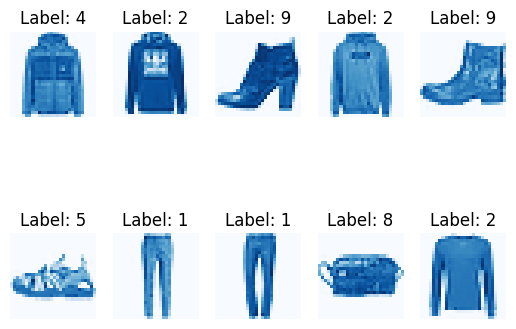

In [5]:
# Display Training Images
data_iter = iter(train_dl)
imgs, lbls = next(data_iter)

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(imgs[i].squeeze(), cmap = "Blues")
  plt.title(f'Label: {lbls[i].item()}')
  plt.axis('off')
plt.show()

In [6]:
# Define Convolutional Neural Network
class CNN(nn.Module):
  def __init__(self, num_classes=10):
    super().__init__()

    self.c1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.relu1 = nn.ReLU()
    self.mp1 = nn.MaxPool2d(kernel_size=2)

    self.c2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.bn2 = nn.BatchNorm2d(64)
    self.relu2 = nn.ReLU()
    self.mp2 = nn.MaxPool2d(kernel_size = 2)

    self.drop = nn.Dropout(0.3)
    self.flat = nn.Flatten()
    self.cls = nn.Linear(64*7*7, num_classes)

  def forward(self, x):
    x = self.c1(x)
    x = self.bn1(x)
    x = self.relu1(x)
    x = self.mp1(x)

    x = self.c2(x)
    x = self.bn2(x)
    x = self.relu2(x)
    x = self.mp2(x)

    x = self.drop(x)
    x = self.flat(x)
    x = self.cls(x)

    return x

In [7]:
# Set GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
# Initialize Model
cnn = CNN(num_classes=10).to(device)

In [9]:
# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr = 0.0005)

In [10]:
# Training Loop
train_loss = []
val_loss = []

for epoch in range(10):
  cnn.train()
  epoch_loss = 0.0

  for images, labels in train_dl:
    images, labels = images.to(device), labels.to(device)
    # print(labels.shape, labels[:5])
    optimizer.zero_grad()
    outputs = cnn(images)
    loss = criterion(outputs, labels)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(cnn.parameters(), max_norm=5.0) # Limits Gradient Norm To Avoid Explosion
    # print(cnn.cls.weight.grad.abs().mean().item())
    optimizer.step()
    epoch_loss += loss.item()

  epoch_loss = epoch_loss / len(train_dl)
  train_loss.append(epoch_loss)

  # Validation Loop
  cnn.eval()
  running_val_loss = 0.0

  with torch.no_grad():
    for images, labels in test_dl:
      images, labels = images.to(device), labels.to(device)
      outputs = cnn(images)
      loss = criterion(outputs, labels)
      running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(test_dl)
    val_loss.append(avg_val_loss)

  print(f'Epoch [{epoch+1}/10], Training Loss: {epoch_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

Epoch [1/10], Training Loss: 0.4183, Validation Loss: 0.3463
Epoch [2/10], Training Loss: 0.3108, Validation Loss: 0.2879
Epoch [3/10], Training Loss: 0.2758, Validation Loss: 0.2752
Epoch [4/10], Training Loss: 0.2527, Validation Loss: 0.2629
Epoch [5/10], Training Loss: 0.2332, Validation Loss: 0.2597
Epoch [6/10], Training Loss: 0.2219, Validation Loss: 0.2432
Epoch [7/10], Training Loss: 0.2152, Validation Loss: 0.2414
Epoch [8/10], Training Loss: 0.2026, Validation Loss: 0.2371
Epoch [9/10], Training Loss: 0.1945, Validation Loss: 0.2371
Epoch [10/10], Training Loss: 0.1869, Validation Loss: 0.2243


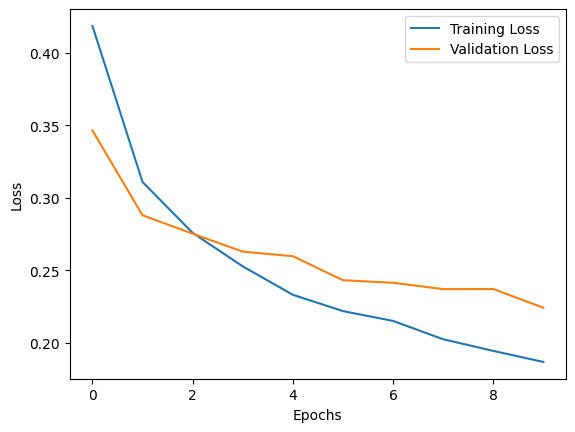

In [11]:
# Plot Learning Curves
plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Define Evaluation Metrics
accuracy = tm.Accuracy(
    task = "multiclass",
    num_classes = 10,
    average = "macro"
).to(device)

precision = tm.Precision(
    task = "multiclass",
    num_classes = 10,
    average = "macro"
).to(device)

recall = tm.Recall(
    task = "multiclass",
    num_classes = 10,
    average = "macro"
).to(device)

In [13]:
# Evaluate Model On Test Set
cnn.eval()

with torch.no_grad():
  for images, labels in test_dl:
    images, labels = images.to(device), labels.to(device)
    output = cnn(images)
    predictions = torch.argmax(output, dim=1)

    accuracy(predictions, labels)
    precision(predictions, labels)
    recall(predictions, labels)

accuracy_score = accuracy.compute()
precision_score = precision.compute()
recall_score = recall.compute()

print(f'Accuracy: {accuracy_score:.4f}')
print(f'Precision: {precision_score:.4f}')
print(f'Recall: {recall_score:.4f}')

Accuracy: 0.9204
Precision: 0.9201
Recall: 0.9204
